In [19]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

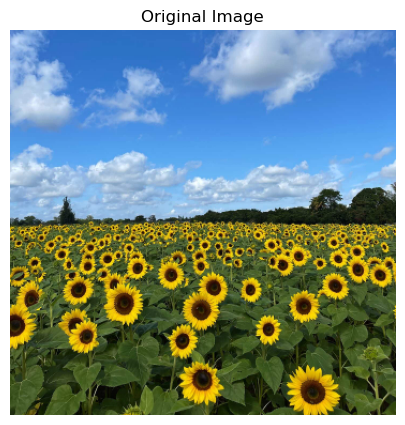

In [20]:
im =cv.imread('../images/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
# Display the original image and the output image
plt.figure(figsize=(10, 5))
plt.title('Original Image')
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

In [21]:
def laplacian_of_gaussian(size: int, sigma: float) -> np.ndarray:

    if size % 2 == 0:
        size += 1
        
    # Create a grid of (x, y) coordinates
    ax = np.linspace(-(size // 2), size // 2, size)
    x, y = np.meshgrid(ax, ax)

    # Calculate the 2D Gaussian kernel
    gaussian = (1/(2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    # Compute the Laplacian of Gaussian
    laplacian = (x**2 + y**2 - 2 * sigma**2) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

    # Normalize the LoG kernel
    return laplacian / np.sum(laplacian)

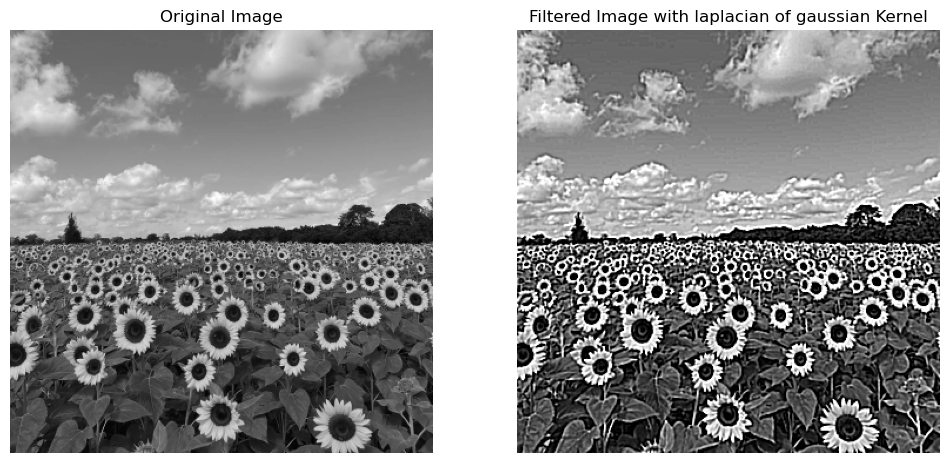

In [22]:
im =cv.imread('../images/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
image_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

kernel_size = 5  # Size of the kernel (e.g., 5x5)
sigma = 1.0      # Standard deviation
laplacian_of_gaussian = laplacian_of_gaussian(kernel_size, sigma)

# Apply Gaussian filtering
filtered_image = cv.filter2D(image_gray, -1, laplacian_of_gaussian)

# Show the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image with laplacian of gaussian Kernel')
plt.axis('off')

plt.show()

In [23]:
def find_scale_space_extrema(image, sigmas):
    """Detect circles by finding extrema in the scale-space."""
    # Store results
    detected_circles = []
    
    # Loop through different sigma values
    for sigma in sigmas:
        filtered_image = laplacian_of_gaussian(image, sigma)
        
        # Normalize the filtered image
        filtered_image = cv.normalize(filtered_image, None, 0, 255, cv.NORM_MINMAX)
        
        # Threshold to find strong responses
        _, thresh_image = cv.threshold(np.uint8(filtered_image), 10, 255, cv.THRESH_BINARY)
        
        # Find contours in the thresholded image
        contours, _ = cv.findContours(thresh_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        
        # Iterate through contours to find circles
        for contour in contours:
            if len(contour) >= 5:  # Need at least 5 points to fit a circle
                (x, y), radius = cv.minEnclosingCircle(contour)
                detected_circles.append((int(x), int(y), int(radius), sigma))
    
    return detected_circles
